<a href="https://colab.research.google.com/github/s-c-soma/AdvanceDataMining-CMPE-256/blob/main/project/CMPE256_Covid19_VacTweet_sentiment_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Public opinion and sentiment analysis on the COVID-19 vaccine using Twitter data</u></b>

# **Team**: Chirp
# **Team Members**: Ashika Anand Babu, Subarna Chowdhury Soma, Vishnu Vardhan Reddy Yeruva

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

COVID-19 originally known as Corona VIrus Disease of 2019, has been declared as a pandemic by World Health Organization (WHO) on 11th March 2020. Unprecedented pressures have mounted on each country to make compelling requisites for controlling the population by assessing the cases and properly utilizing available resources. The rapid number of exponential cases globally has become the apprehension of panic, fear and anxiety among people. The mental and physical health of the global population is found to be directly proportional to this pandemic disease. It is the need of the hour to implement different measures to safeguard the countries by demystifying the pertinent facts and information.

# Workflow

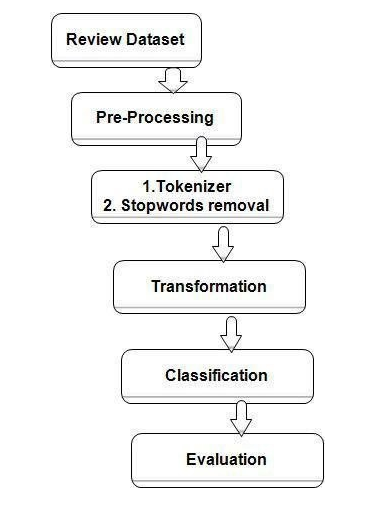

# Connection With Drive

In [77]:
#cannot share in github right now as the repository is private.
from google.colab import drive
drive.mount('/content/gdrive')
# Mount Google Drive
# from google.colab import drive
# import pandas as pd
# drive.mount('/content/drive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [78]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/CMPE256_Project/Data"

In [79]:
%cd /content/gdrive/My Drive/CMPE256_Project/Data/

/content/gdrive/My Drive/CMPE256_Project/Data


In [80]:
! kaggle datasets download -d gpreda/all-covid19-vaccines-tweets

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /content/gdrive/My Drive/CMPE256_Project/Data. Or use the environment method.


In [81]:
!unzip \*.zip  && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


#**1.Lets Invite Some Libraries.**

In [82]:
import pickle

In [83]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
from gensim.models.doc2vec import LabeledSentence
import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import pickle
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [84]:
# working_dir_path = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/Day 1/Copy of Coronavirus Tweets.csv'
# df = pd.read_csv(working_dir_path,encoding = 'latin')

# Twitter Data: Load Data

* https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets
* https://www.kaggle.com/gpreda/covid-world-vaccination-progress


In [85]:
#Reading vaccination_all_tweets CSV and Loading our data frame
# Read in tweets referencing Joe Biden and Donald Trump
df_vacc_tweet = pd.read_csv('./vaccine_tweets_cleans.csv', lineterminator='\n', parse_dates=True)
# df_tweets_training = pd.read_csv('./tweet_dataset.csv')
# df_tweets_training.head(3)

In [86]:
df_vacc_tweet.shape

(219031, 31)

In [87]:

df_vacc_tweet.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet\r', 'date_new', 'hashtags_count', 'hashtags_individual',
       'datedt', 'year', 'month', 'day', 'dayofweek', 'hour', 'minute',
       'dayofyear', 'date_only', 'sentiment_score', 'sentiment_vaber',
       'clean_data'],
      dtype='object')

# **2. Reviewing Our Dataset**

In [88]:
# df_vacc_tweet['polarity'] = df_vacc_tweet['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
# df_vacc_tweet['subjectivity'] = df_vacc_tweet['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df_vacc_tweet.rename(columns={'sentiment_vaber': 'sentiment'}, inplace=True)
df_vacc_tweet.head(3)

id  ...                                                                        clean_data
0  1340539111971516416  ...                           Same folks said daikon paste could treat cytokine storm
1  1338158543359250433  ...  While world wrong side history year hopefully biggest vaccination effort weve ev
2  1337858199140118533  ...                                             Russian vaccine created last 24 years

[3 rows x 31 columns]

In [89]:
# There are null values in location column
df_vacc_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219031 entries, 0 to 219030
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   219031 non-null  int64  
 1   user_name            219030 non-null  object 
 2   user_location        155898 non-null  object 
 3   user_description     202998 non-null  object 
 4   user_created         219031 non-null  object 
 5   user_followers       219031 non-null  int64  
 6   user_friends         219031 non-null  int64  
 7   user_favourites      219031 non-null  int64  
 8   user_verified        219031 non-null  bool   
 9   date                 219031 non-null  object 
 10  text                 219031 non-null  object 
 11  hashtags             219031 non-null  object 
 12  source               218912 non-null  object 
 13  retweets             219031 non-null  int64  
 14  favorites            219031 non-null  int64  
          219031 non-n

In [90]:
# There 41157 rows and 6 columns in our database
df_vacc_tweet.shape

(219031, 31)

In [91]:
# Names Of columns in our dataset
df_vacc_tweet.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet\r', 'date_new', 'hashtags_count', 'hashtags_individual',
       'datedt', 'year', 'month', 'day', 'dayofweek', 'hour', 'minute',
       'dayofyear', 'date_only', 'sentiment_score', 'sentiment', 'clean_data'],
      dtype='object')

In [92]:
# All tweets came only from Dec-2020 and Nov-2021.
df_vacc_tweet.date_new.value_counts()

print ("Min Date=", df_vacc_tweet.date_new.min())
print ("Max Date=", df_vacc_tweet.date_new.max())

Min Date= 2020-12-12
Max Date= 2021-11-10


In [93]:
# There are 12220 unique locations from where the tweets came.
df_vacc_tweet['user_location'].nunique()

24929

In [94]:
# There are 3 unique sentiment types in our dataset
df_vacc_tweet['sentiment'].value_counts()

Neutral     106875
Positive     76262
Negative     35894
Name: sentiment, dtype: int64

# Going deeper into tweet and sentiment.

In [95]:
df_vacc_tweet[df_vacc_tweet['sentiment']=='Positive'].head(2)

id  ...                                               clean_data
0  1340539111971516416  ...  Same folks said daikon paste could treat cytokine storm
2  1337858199140118533  ...                    Russian vaccine created last 24 years

[2 rows x 31 columns]

In [96]:
df_vacc_tweet[(df_vacc_tweet['sentiment']=='Neutral') & (df_vacc_tweet['user_location'] <= 'California' )].head(2)

id  ...                                                              clean_data
115  1338492425921122306  ...  If science everywhere results Entire world approve vaccine one country
117  1338491398379753480  ...                                             1st doses vaccine arrive By

[2 rows x 31 columns]

In [97]:
pd.isnull(df_vacc_tweet["sentiment"])


0         False
1         False
2         False
3         False
4         False
          ...  
219026    False
219027    False
219028    False
219029    False
219030    False
Name: sentiment, Length: 219031, dtype: bool

# Looking For Null Values

In [98]:
missing_values = pd.DataFrame()
missing_values['column'] = df_vacc_tweet.columns

missing_values['percent'] = [round(100* df_vacc_tweet[col].isnull().sum() / len(df_vacc_tweet), 2) for col in df_vacc_tweet.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]

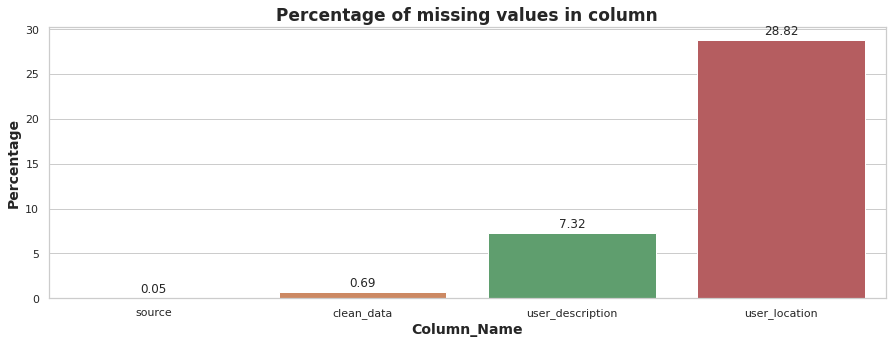

In [99]:
plt.figure(figsize=(15, 5))
sns.set(style='whitegrid', color_codes=True)
splot=sns.barplot(x='column', y='percent', data=missing_values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.ylabel("Percentage", size=14, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=17)
plt.show()


# Heat Map for missing values

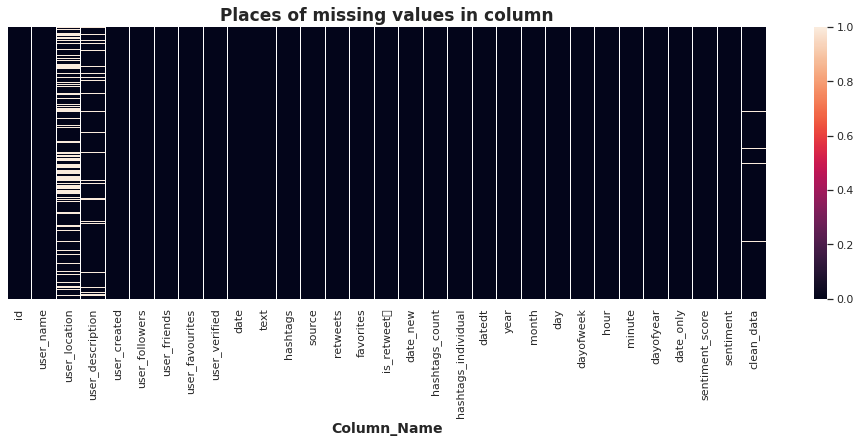

In [100]:
plt.figure(figsize=(17, 5))
sns.heatmap(df_vacc_tweet.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

# Unique Values In Each Feature Coulmn

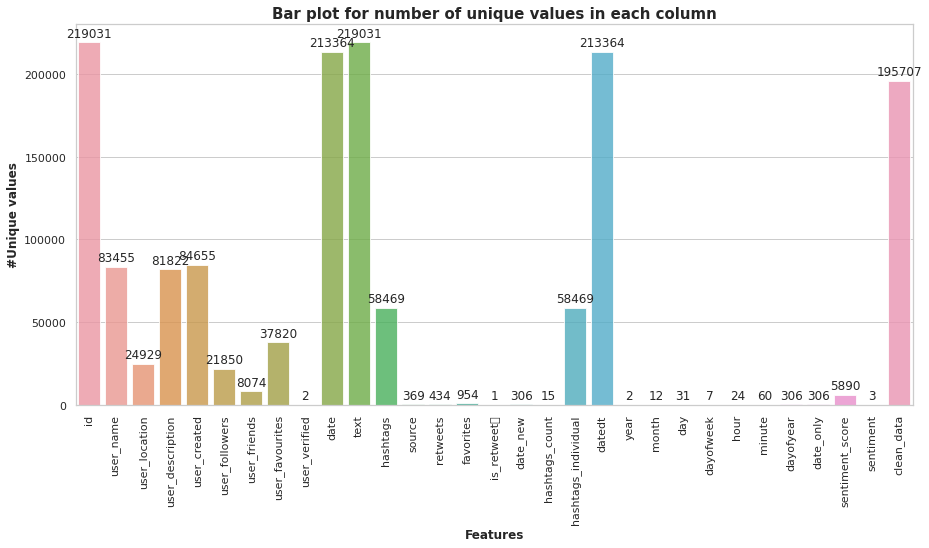

In [101]:
unique_df = pd.DataFrame()
unique_df['Features'] = df_vacc_tweet.columns
unique=[]
for i in df_vacc_tweet.columns:
    unique.append(df_vacc_tweet[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

# Plot Of Top 15 Locations Of Tweet.

In [102]:
loc_analysis = pd.DataFrame(df_vacc_tweet['user_location'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'user_location':'count'})

In [103]:
import plotly.graph_objects as go


In [104]:
data = {
   "values": loc_analysis['count'][:15],
   "labels": loc_analysis.index[:15],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Ratio on Location</b>", legend=dict(x=0.1, y=1.1, orientation="h"))

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

In [105]:
#sns.catplot("user_location", data=df_vacc_tweet, kind="count", height=8)

# Top 10 locations of tweet

In [106]:
Top_Location_Of_tweet= df_vacc_tweet['user_location'].value_counts().head(10)

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')

In [107]:
Top_Location_Of_tweet.head(10)

Bengaluru, India                  18939
India                              8072
New Delhi, India                   3006
Toronto, Canada  and Worldwide     2653
United States                      1973
Mumbai, India                      1888
New Delhi                          1198
Sri Lanka                          1101
Beijing, China                     1001
Mumbai                              996
Name: user_location, dtype: int64

In [108]:
Top_Location_Of_tweet_df=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet_df.reset_index(inplace=True)
Top_Location_Of_tweet_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet_df

Location  user_location
0                Bengaluru, India          18939
1                           India           8072
2                New Delhi, India           3006
3  Toronto, Canada  and Worldwide           2653
4                   United States           1973
5                   Mumbai, India           1888
6                       New Delhi           1198
7                       Sri Lanka           1101
8                  Beijing, China           1001
9                          Mumbai            996

[Text(0, 0, 'Bengaluru, India'),
 Text(0, 0, 'India'),
 Text(0, 0, 'New Delhi, India'),
 Text(0, 0, 'Toronto, Canada  and Worldwide'),
 Text(0, 0, 'United States'),
 Text(0, 0, 'Mumbai, India'),
 Text(0, 0, 'New Delhi'),
 Text(0, 0, 'Sri Lanka'),
 Text(0, 0, 'Beijing, China'),
 Text(0, 0, 'Mumbai')]

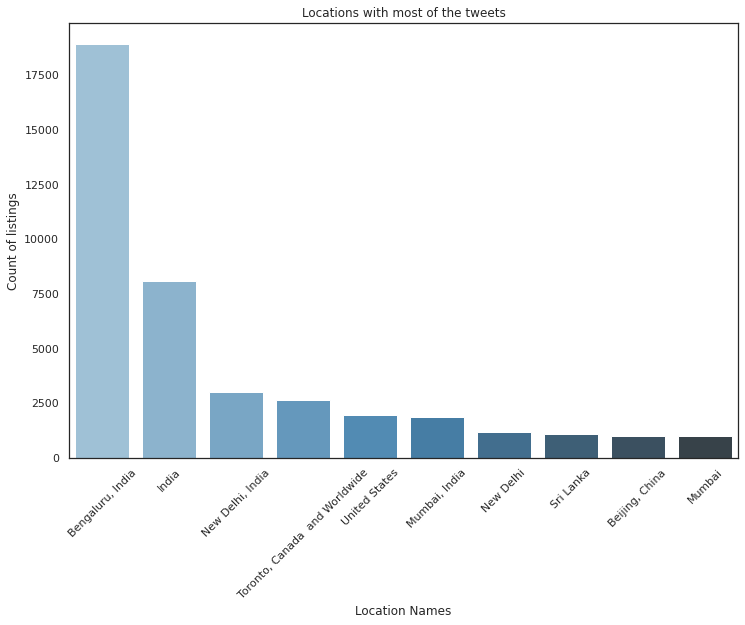

In [109]:
viz_1=sns.barplot(x="Location", y="user_location", data=Top_Location_Of_tweet_df,
                 palette='Blues_d')
viz_1.set_title('Locations with most of the tweets')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Location Names')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

# Sentiments Countplot

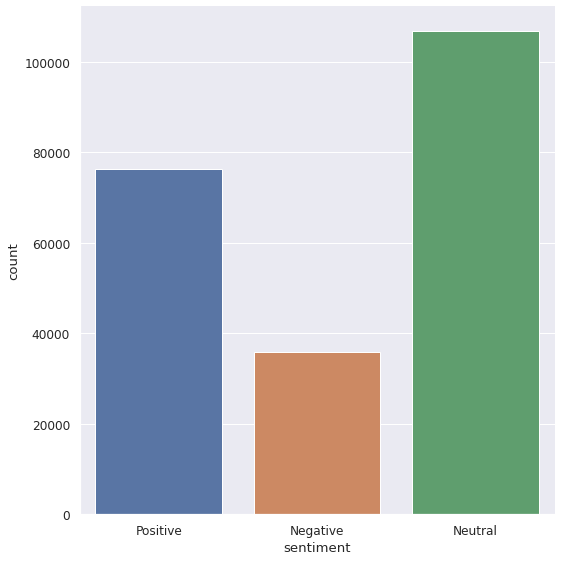

In [110]:
sns.set(font_scale=1.1)
sns.catplot("sentiment", data=df_vacc_tweet, kind="count", height=8)

# Data Preprocessing

**A) Removing @user**

In [111]:
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [112]:
# create new column with removed @user
df_vacc_tweet['Tweet'] = np.vectorize(remove_pattern)(df_vacc_tweet['text'], '@[\w]*')

In [113]:
df_vacc_tweet.head(2)

id  ...                                                                                                                                         Tweet
0  1340539111971516416  ...                                             Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
1  1338158543359250433  ...  While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm

[2 rows x 32 columns]

**REMOVED HTTP AND URLS FROM TWEET**

In [114]:
import re
df_vacc_tweet['Tweet'] = df_vacc_tweet['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [115]:
df_vacc_tweet.head(3)

id  ...                                                                                                                  Tweet
0  1340539111971516416  ...                                             Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech 
1  1338158543359250433  ...  While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… 
2  1337858199140118533  ...  #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… 

[3 rows x 32 columns]

**B) Removing Punctuations, Numbers, and Special Characters**

In [116]:
# remove special characters, numbers, punctuations
df_vacc_tweet['Tweet'] = df_vacc_tweet['Tweet'].str.replace('[^a-zA-Z#]+',' ')

In [117]:
df_vacc_tweet.head(5)

id  ...                                                                                                               Tweet
0  1340539111971516416  ...                                          Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech 
1  1338158543359250433  ...  While the world has been on the wrong side of history this year hopefully the biggest vaccination effort we ve ev 
2  1337858199140118533  ...       #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid Russian vaccine is created to last years 
3  1337855739918835717  ...       Facts are immutable Senator even when you re not ethically sturdy enough to acknowledge them You were born i 
4  1337854064604966912  ...                                Explain to me again why we need a vaccine #whereareallthesickpeople #PfizerBioNTech 

[5 rows x 32 columns]

**C) Removing Short Words**

In [118]:
# remove short words
df_vacc_tweet['Tweet'] = df_vacc_tweet['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [119]:
df_vacc_tweet.head(2)

id  ...                                                                                               Tweet
0  1340539111971516416  ...                             Same folks said daikon paste could treat cytokine storm #PfizerBioNTech
1  1338158543359250433  ...  While the world has been the wrong side history this year hopefully the biggest vaccination effort

[2 rows x 32 columns]

**D) Tokenization**

In [120]:
# create new variable tokenized tweet 
tokenized_tweet = df_vacc_tweet['Tweet'].apply(lambda x: x.split())

In [121]:
df_vacc_tweet.head(2)

id  ...                                                                                               Tweet
0  1340539111971516416  ...                             Same folks said daikon paste could treat cytokine storm #PfizerBioNTech
1  1338158543359250433  ...  While the world has been the wrong side history this year hopefully the biggest vaccination effort

[2 rows x 32 columns]

**E) Stemming**

In [122]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [123]:
df_vacc_tweet.head(2)

id  ...                                                                                               Tweet
0  1340539111971516416  ...                             Same folks said daikon paste could treat cytokine storm #PfizerBioNTech
1  1338158543359250433  ...  While the world has been the wrong side history this year hopefully the biggest vaccination effort

[2 rows x 32 columns]

In [124]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# change df['Tweet'] to tokenized_tweet

In [125]:
df_vacc_tweet['Tweet']  = tokenized_tweet


In [126]:
df_vacc_tweet.head(2)

id  ...                                                                                   Tweet
0  1340539111971516416  ...                    same folk said daikon past could treat cytokin storm #pfizerbiontech
1  1338158543359250433  ...  while the world ha been the wrong side histori thi year hope the biggest vaccin effort

[2 rows x 32 columns]

# **Story Generation and Visualization from Tweets**

*  What are the most common words in the entire dataset?

*  What are the most common words in the dataset for negative and positive tweets, respectively?

*  How many hashtags are there in a tweet?

*  Which trends are associated with my dataset?

*  Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

A) **Understanding the common words used in the tweets: WordCloud**

In [127]:
df_vacc_tweet.head(2)

id  ...                                                                                   Tweet
0  1340539111971516416  ...                    same folk said daikon past could treat cytokin storm #pfizerbiontech
1  1338158543359250433  ...  while the world ha been the wrong side histori thi year hope the biggest vaccin effort

[2 rows x 32 columns]

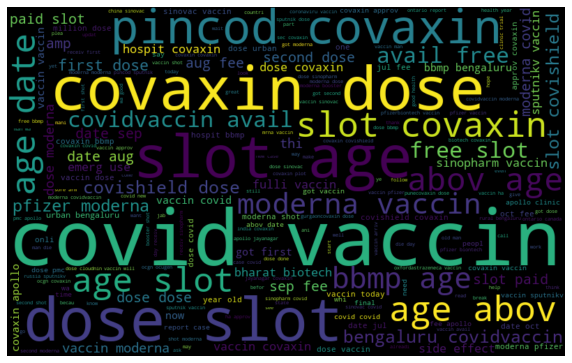

In [128]:
# create text from all tweets
all_words = ' '.join([text for text in df_vacc_tweet['Tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

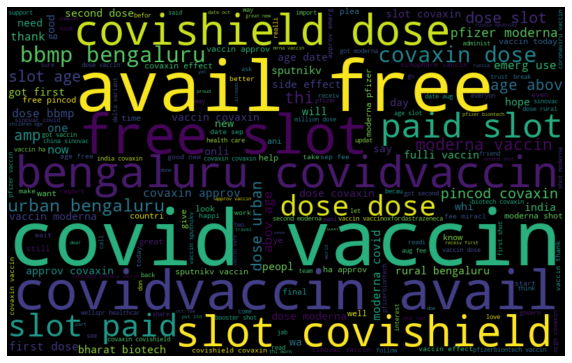

In [129]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df_vacc_tweet['Tweet'][df_vacc_tweet['sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

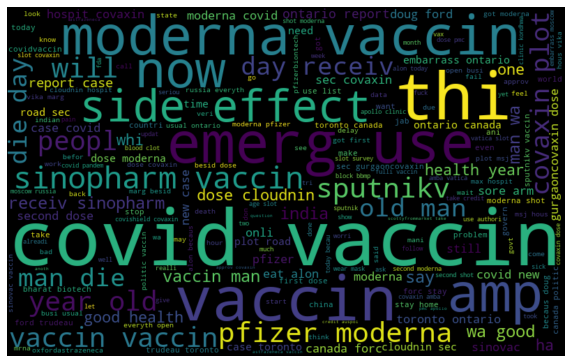

In [130]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df_vacc_tweet['Tweet'][df_vacc_tweet['sentiment'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

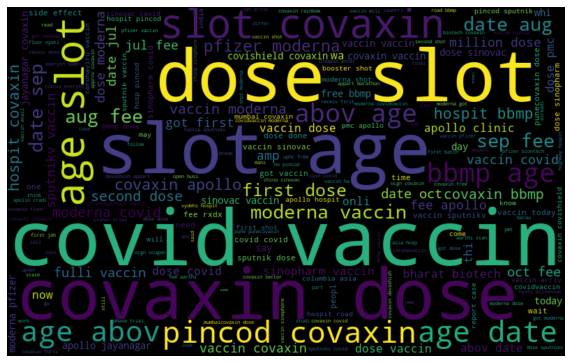

In [131]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df_vacc_tweet['Tweet'][df_vacc_tweet['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**D) Understanding the impact of Hashtags on tweets sentiment**

In [132]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [133]:
# extracting hashtags from 
# HT_Extremely_Positive = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Extremely Positive'])
HT_Positive = hashtag_extract(df_vacc_tweet['text'][df_vacc_tweet['sentiment'] == 'Positive'])
HT_Neutral = hashtag_extract(df_vacc_tweet['text'][df_vacc_tweet['sentiment'] == 'Neutral'])
HT_Negative = hashtag_extract(df_vacc_tweet['text'][df_vacc_tweet['sentiment'] == 'Negative'])
# HT_Extremely_Negative = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Extremely Negative'])



# unnesting list
# HT_Extremely_Positive = sum(HT_Extremely_Positive, [])
HT_Positive = sum(HT_Positive, [])
HT_Neutral = sum(HT_Neutral, [])
HT_Negative = sum(HT_Negative,[])
# HT_Extremely_Negative = sum(HT_Extremely_Negative,[])

In [134]:
print(HT_Positive)

['PfizerBioNTech', 'coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19', 'vaccination', 'BidenHarris', 'Election2020', 'COVID19', 'CovidVaccine', 'vaccine', 'Corona', 'PfizerBioNTech', 'bbcnews', 'NYTimes', 'BBCNews', 'PfizerBioNTech', 'PfizerBioNTech', 'docnosofficial', 'covid19', 'ThankYouNHS', 'PfizerBioNTech', 'CovidVaccine', 'PfizerBioNTech', 'FDA', 'vaccine', 'supplychain', 'sharedvisibility', 'ICYMI', 'FDA', 'PfizerBioNTech', 'COVID19', 'Vaccine', 'FDA', 'coronavirus', 'PfizerBioNTech', 'Moderna', 'vaccines', 'CovidVaccine', 'PfizerBioNTech', 'VaccinesSaveLives', 'VaccinesWork', 'PfizerBioNTech', 'PfizerBioNTech', 'WarpSpeed', 'PfizerBioNTech', 'Moderna', 'GrifterTrump', 'CovidVaccine', 'AnitaQuidangen', 'Toronto', 'Canada', 'PfizerBioNTech', 'COVID19', 'CovidVaccine', 'PfizerBioNTech', 'coldchain', 'PfizerBioNTech', 'industrial', 'cre', 'CovidVaccine', 'PfizerBioNTech', 'PfizerBioNTech', 'vaccine', 'BreakingNews', 'UPDATE', 'PfizerBioNTech', 'COVID1

In [135]:
print(HT_Negative)

['CovidVaccine', 'COVIDIOTS', 'coronavirus', 'CovidVaccine', 'CovidVaccines', 'Pfizervaccine', 'FDA', 'EUA', 'PfizerBioNTech', 'FDA', 'PfizerBioNTech', 'coronavirus', 'CovidVaccine', 'BellsPalsy', 'vaccination', 'vaccine', 'PfizerBioNTech', 'Pfizer', 'CrimesAgainstHumanity', 'crushCovid', 'CoverUp', 'PfizerBioNTech', '2', 'QP', 'VaccinesSaveLives', 'PfizerBioNTech', 'PFE', 'Pfizer', 'Pfizervaccine', 'scientist', 'Fish', 'COVID19', 'Vaccine', 'Seafood', 'PfizerBioNTech', 'Vaccine', 'UsTreasury', 'Pfizer', 'CovidVaccine', 'Pfizervaccine', 'PfizerBioNTech', 'CoronavirusPandemic', 'Turkey', 'PfizerBioNTech', 'America', 'Trump', 'DonaldTrump', 'JoeBiden', 'NewYork', 'Washington', 'WhiteHouse', 'CoronavirusPandemic', 'Turkey', 'PfizerBioNTech', 'CoronavirusPandemic', 'PfizerBioNTech', 'vaccine', 'Canada', 'PfizerBioNTech', 'COVID19', 'Canada', 'PfizerBioNTech', 'COVID19', 'PfizerBioNTech', 'COVID19Vaccine', 'PfizerBioNTech', 'vaccine', 'vaccination', 'Pfizervaccine', 'Covid_19', 'PfizerBioNT

In [136]:
print(HT_Neutral)

['whereareallthesickpeople', 'PfizerBioNTech', 'CovidVaccine', 'covid19', 'PfizerBioNTech', 'Moderna', 'CovidVaccine', 'COVID19Vaccine', 'US', 'pakustv', 'NYC', 'Healthcare', 'GlobalGoals', 'PfizerBioNTech', 'Vaccine', 'vaccine', 'YellowFever', 'COVID19', 'ImmunityPassports', 'SARSCoV2', 'PfizerBioNtech', 'Britain', 'December', 'Iran', 'coronavirus', 'PfizerBioNTech', 'fda', 'vaccine', 'vaccine', 'stayhome', 'StayAtHome', 'StayAtHomeSaveLives', 'Vaccine', 'TrumpVaccine', 'AstraZeneca', 'PfizerBioNTech', 'Pfizervaccine', 'PfizerCovidVaccine', 'Pfizer', 'covid', 'Pfizervaccine', 'PfizerBioNTech', 'CovidVaccine', 'PfizerBioNTech', 'Pfizervaccine', 'PfizerProud', 'CovidVaccine', 'Pakistan', 'PfizerBioNTech', 'oxfordvaccine', 'PfizerBioNTech', 'CovidVaccine', 'PfizerBioNTech', 'PfizerBioNTech', 'CovidVaccine', 'CovidVaccine', 'Pfizer', 'PfizerBioNTech', 'COVID19', 'CapeTown', 'vaccine', 'DonTheCon', 'GrifterInChief', 'TrumpForPrison', 'TrumpCrimeFamily', 'COVID', 'PfizerBioNTech', 'vaccine'

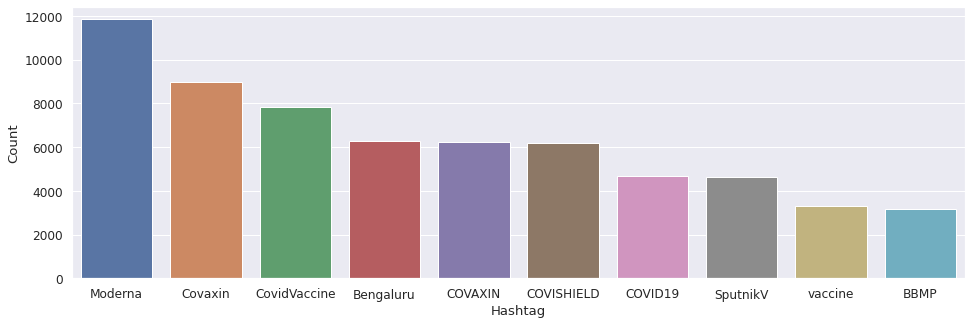

In [137]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

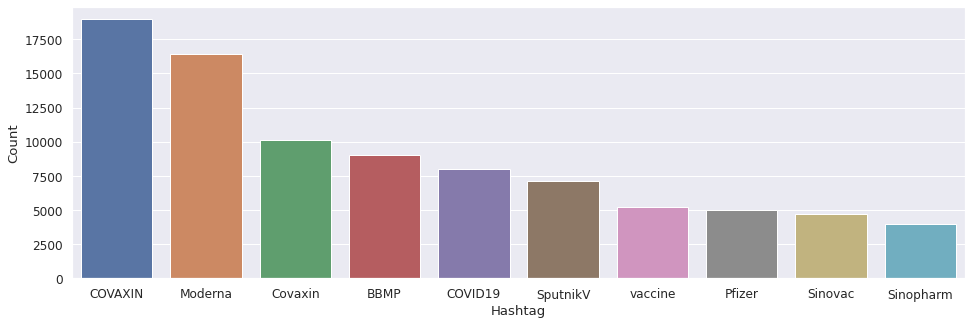

In [138]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

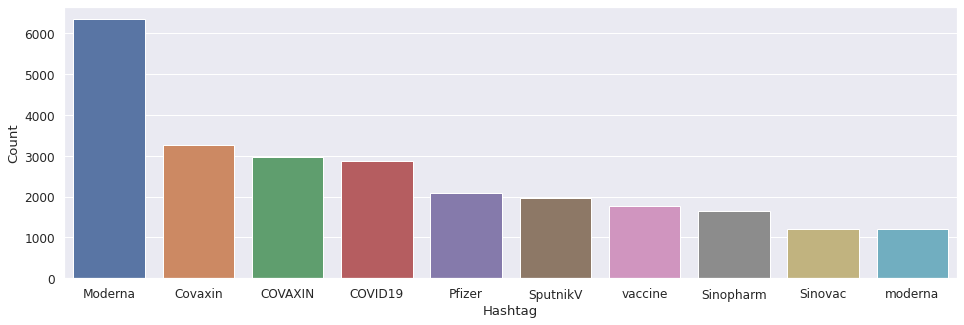

In [139]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

#**4. Extracting Features from Cleaned Tweets**

In [140]:
new_df = df_vacc_tweet[['Tweet','sentiment']]

In [141]:
new_df.head()

Tweet sentiment
0                               same folk said daikon past could treat cytokin storm #pfizerbiontech  Positive
1             while the world ha been the wrong side histori thi year hope the biggest vaccin effort  Negative
2  #coronaviru #sputnikv #astrazeneca #pfizerbiontech #moderna #covid russian vaccin creat last year  Positive
3           fact are immut senat even when you not ethic sturdi enough acknowledg them you were born   Neutral
4                             explain again whi need vaccin #whereareallthesickpeopl #pfizerbiontech   Neutral

In [142]:
df_vacc_tweet['sentiment'].value_counts()

Neutral     106875
Positive     76262
Negative     35894
Name: sentiment, dtype: int64

**Converting into lower case**

In [143]:
#new_df["Tweet"] = new_df["Tweet"].str.lower()#.str.split()

In [144]:
#new_df.head(5)

**Removing Stopwords**

In [145]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [146]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [147]:
new_df['Tweet'].apply(lambda x: [item for item in x if item not in stop])

0                                                                                    [e,  , f, l, k,  ,  , k, n,  , p,  , c, u, l,  , r, e,  , c, k, n,  , r,  , #, p, f, z, e, r, b, n, e, c, h]
1                  [w, h, l, e,  , h, e,  , w, r, l,  , h,  , b, e, e, n,  , h, e,  , w, r, n, g,  , e,  , h, r,  , h,  , e, r,  , h, p, e,  , h, e,  , b, g, g, e,  , v, c, c, n,  , e, f, f, r]
2         [#, c, r, n, v, r, u,  , #, p, u, n, k, v,  , #, r, z, e, n, e, c,  , #, p, f, z, e, r, b, n, e, c, h,  , #, e, r, n,  , #, c, v,  , r, u, n,  , v, c, c, n,  , c, r, e,  , l,  , e, r]
3               [f, c,  , r, e,  , u,  , e, n,  , e, v, e, n,  , w, h, e, n,  , u,  , n,  , e, h, c,  , u, r,  , e, n, u, g, h,  , c, k, n, w, l, e, g,  , h, e,  , u,  , w, e, r, e,  , b, r, n]
4                                       [e, x, p, l, n,  , g, n,  , w, h,  , n, e, e,  , v, c, c, n,  , #, w, h, e, r, e, r, e, l, l, h, e, c, k, p, e, p, l,  , #, p, f, z, e, r, b, n, e, c, h]
                              

In [148]:
new_df.head(6)

Tweet sentiment
0                               same folk said daikon past could treat cytokin storm #pfizerbiontech  Positive
1             while the world ha been the wrong side histori thi year hope the biggest vaccin effort  Negative
2  #coronaviru #sputnikv #astrazeneca #pfizerbiontech #moderna #covid russian vaccin creat last year  Positive
3           fact are immut senat even when you not ethic sturdi enough acknowledg them you were born   Neutral
4                             explain again whi need vaccin #whereareallthesickpeopl #pfizerbiontech   Neutral
5           doe anyon have ani use advic guidanc for whether the covid vaccin safe whilst breastfeed  Positive

In [149]:
new_df.shape

(219031, 2)

In [150]:
new_df.isnull().sum()

Tweet        0
sentiment    0
dtype: int64

In [151]:
new_df.head(3)

Tweet sentiment
0                               same folk said daikon past could treat cytokin storm #pfizerbiontech  Positive
1             while the world ha been the wrong side histori thi year hope the biggest vaccin effort  Negative
2  #coronaviru #sputnikv #astrazeneca #pfizerbiontech #moderna #covid russian vaccin creat last year  Positive

# Spitting Our Dataset into Training And Testing Dataset ( For Multiclass Classification)

In [152]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (175224, 2)
valid shape :  (43807, 2)


# Use Of Counter Vectorizer For Multi Class Classification

In [153]:
type(train.Tweet.values)
# X_train1 = vectorizer.fit_transform(train.Tweet.values)

numpy.ndarray

In [154]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.sentiment.values
y_valid = valid.sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (175224, 44832)
X_train.shape :  (43807, 44832)
y_train.shape :  (175224,)
y_valid.shape :  (43807,)


# Stochastic Gradient Descent-SGD Classifier( MULTICLASS CLASSIFICATION)

In [155]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.8874526320595352
Validation accuracy Score :  0.8811833725203735
              precision    recall  f1-score   support

    Negative       0.68      0.87      0.76      5620
     Neutral       0.94      0.89      0.91     22465
    Positive       0.90      0.87      0.89     15722

    accuracy                           0.88     43807
   macro avg       0.84      0.88      0.85     43807
weighted avg       0.89      0.88      0.88     43807



In [156]:
with open('./model_pkl/sgd_multiclas.pkl', 'wb') as files:
    pickle.dump(sgd_clf, files)

In [157]:
# load saved model
with open('./model_pkl/sgd_multiclas.pkl' , 'rb') as f:
    sgd_clf_ = pickle.load(f)

In [158]:
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

x_arr = np.array(["covid vaccine don't like"])
x_arr[0]
# valid.head(1)

"covid vaccine don't like"

In [159]:
# valid.Tweet.values[0] = "covid positive"
# valid.Tweet.values[0]

In [160]:
x_train = vectorizer.fit_transform(x_arr)
x_value = vectorizer.transform(x_arr)
x_value


<1x3 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [161]:
# sgd_clf_.predict(x_value) #[0] # similar

# Naive Bayes Classifier for MULTICLASS Classification

In [162]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

with open('./model_pkl/naiveByes_multiclass_pkl', 'wb') as files:
    pickle.dump(naiveByes_clf, files)

training accuracy Score    :  0.7975562708304799
Validation accuracy Score :  0.769762823293081
              precision    recall  f1-score   support

    Negative       0.71      0.63      0.66      8108
     Neutral       0.74      0.90      0.81     17480
    Positive       0.85      0.71      0.77     18219

    accuracy                           0.77     43807
   macro avg       0.76      0.74      0.75     43807
weighted avg       0.78      0.77      0.77     43807



# RANDOM FOREST CLASSIFIER (For Multiclass Classification)

In [163]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

with open('./model_pkl/rf_multiclass_pkl', 'wb') as files:
    pickle.dump(rf_clf, files)

Training accuracy Score    :  0.9963874811669634
Validation accuracy Score :  0.874494943730454
              precision    recall  f1-score   support

    Negative       0.62      0.87      0.73      5126
     Neutral       0.95      0.87      0.91     23277
    Positive       0.89      0.88      0.88     15404

    accuracy                           0.87     43807
   macro avg       0.82      0.87      0.84     43807
weighted avg       0.89      0.87      0.88     43807



# Extreme Gradient Boosting ( For Multiclass Classification)

In [164]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

with open('./model_pkl/xgboost_multiclass_pkl', 'wb') as files:
    pickle.dump(xgboost_clf, files)

Training accuracy Score    :  0.7256996758434917
Validation accuracy Score :  0.7243819480904878
              precision    recall  f1-score   support

    Negative       0.24      0.87      0.38      2003
     Neutral       0.97      0.67      0.79     31083
    Positive       0.61      0.87      0.72     10721

    accuracy                           0.72     43807
   macro avg       0.61      0.80      0.63     43807
weighted avg       0.85      0.72      0.75     43807



# Support vector machine( For Multiclass Classification)

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

with open('./model_pkl/svc_multiclass_pkl', 'wb') as files:
    pickle.dump(svc, files)

# Logistic Regression(For Multiclass Classification)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

with open('./model_pkl/logreg_multiclass_pkl', 'wb') as files:
    pickle.dump(logreg, files)

# CATBOOST MODEL (For Multiclass Classification)

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [ ]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_valid, y_valid), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

In [ ]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

with open('./model_pkl/catboost_multiclass_pkl', 'wb') as files:
    pickle.dump(clf2, files)

# All the multiclass models test accuracy in descending order

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'], #
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]}) #

models.sort_values(by='Test accuracy', ascending=False)

#  **CONVRTING OUR MULTICLASS CLASSIFICATION INTO BINARY CLASSIFICATION**

In [ ]:
new_df.head()

In [ ]:
CATBOOST = new_df[['Tweet','sentiment']]

In [ ]:
CATBOOST.head(2)

In [ ]:
CATBOOST["sentiment"]= CATBOOST["sentiment"].replace('Positive',1)  
# CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Extremely Positive',1) 
CATBOOST["sentiment"]= CATBOOST["sentiment"].replace('Neutral',1) 
CATBOOST["sentiment"]= CATBOOST["sentiment"].replace('Negative',0) 
# CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Extremely Negative',0) 


In [ ]:
CATBOOST.head(2)

In [ ]:
CATBOOST['sentiment'].value_counts()

In [ ]:
X = CATBOOST.drop('sentiment', axis=1)
y = CATBOOST.sentiment

In [ ]:
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
CATBOOST['Tweet'].apply(lambda x: [item for item in x if item not in stop])

In [ ]:
CATBOOST.head(2)

# DIVIDING OUR DATASET INTO TRAINING AND TESTING

In [ ]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(CATBOOST,test_size = 0.2,random_state=0,stratify = CATBOOST.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

# USING COUNT VECTORIZER

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

# NAIVE BAYES CLASSIFIER FOR BINARY CLASSIFICATION.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

with open('./model_pkl/naiveByes_binclass_pkl', 'wb') as files:
    pickle.dump(naiveByes_clf, files)

# RANDOM FOREST CLASSIFIER FOR BINARY CLASSIFICATION

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

with open('./model_pkl/rf_binclass_pkl', 'wb') as files:
    pickle.dump(rf_clf, files)

# LOGISTIC REGRESSION(BINARY CLASSIFICATION)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

with open('./model_pkl/logreg_binclass_pkl', 'wb') as files:
    pickle.dump(logreg, files)

# CATBOOST ALGORITHM FOR BINARY CLASSIFICATION

In [ ]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_valid, y_valid), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

In [ ]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

with open('./model_pkl/catboost_binclass_pkl', 'wb') as files:
    pickle.dump(clf2, files)

# XG BOOST( BINARY CLASSIFICATION)

In [ ]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

with open('./model_pkl/xgboost_binclass_pkl', 'wb') as files:
    pickle.dump(xgboost_clf, files)

# SUPPORT VECTOR MACHINE(BINARY CLASSIFICATION)

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

with open('./model_pkl/svc_binclass_pkl', 'wb') as files:
    pickle.dump(svc, files)

# **Winner Model:**

# Stochastic Gradient Descent-SGD Classifier( BINARY CLASSIFICATION)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

with open('./model_pkl/sgd_binclass_pkl', 'wb') as files:
    pickle.dump(sgd_clf, files)

In [ ]:
# Get the predicted classes
train_class_preds = sgd_clf.predict(X_train)
test_class_preds = sgd_clf.predict(X_valid)

In [ ]:
# Get the confusion matrix for both train and test. We are getting very low type and type 2 errors.

labels = ['Negative', 'Positive']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Let's check the overall accuracy. Overall accuracy is very good.
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

y_pred = sgd_clf.predict(X_valid)

score =accuracy_score(y_valid,y_pred)
print('accuracy is', score)

In [ ]:
# F1 score for our classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


y_pred =  sgd_clf.predict(X_valid)
print(f1_score(y_valid,y_pred, average="macro"))

In [ ]:
#score is mean accuracy
scikit_score = sgd_clf.score(X_valid,y_valid)
print('scikit score:', scikit_score)

In [ ]:
# Recall score for our winner model
recall_score(y_valid, y_pred, average='macro')

In [ ]:
# Classification Report for our stochastic gradient descent algorithm
classification_report(y_valid,y_pred)

In [ ]:
# Very low type 1 and type 2 error
confusion_matrix(y_valid,y_pred)

# EVALUATION OF ALL BINARY CLASSIFICATION MODELS

**All the model test accuracy by descending order**

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

# **THANKS YOU. WHAT'S YOUR SENTIMENT FOR THIS PROJECT? FEELING HAPPY OR NOT??**

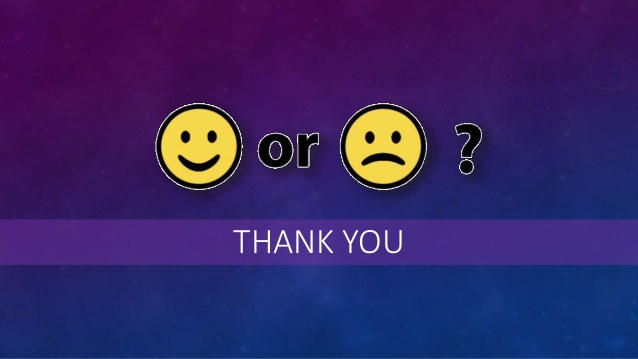